In [1]:
import tensorflow as tf
import numpy as np

import PIL.Image
from cStringIO import StringIO
from IPython.display import clear_output, Image, display

In [3]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
    """
    Display an array as a picture.
    """
    a = (a - rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a, 0, 255))
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
    return

In [4]:
sess = tf.InteractiveSession()

In [6]:
def make_kernel(a):
    '''
    Transform a 2D array into a convolution kernel
    '''
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1, 1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    '''
    A simplified 2D convolution operation
    '''
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    '''is)

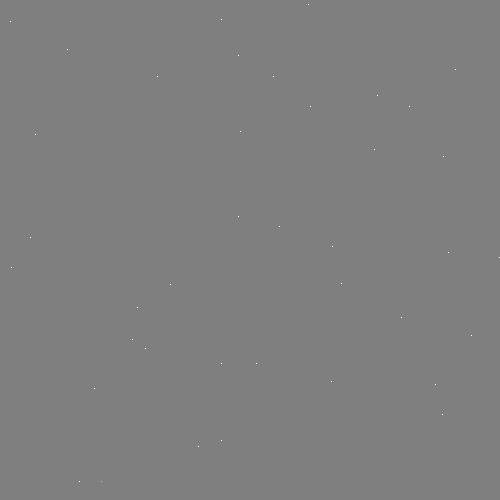

In [11]:
N = 500

u_init = np.zeros([N, N], dtype="float32")
ut_init = np.zeros([N, N], dtype="float32")

for n in range(40):
    a, b = np.random.randint(0, N, 2)
    u_init[a, b] = np.random.uniform()
    
DisplayArray(u_init, rng=[-0.1, 0.1])

In [12]:
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

step = tf.group(U.assign(U_), Ut.assign(Ut_))

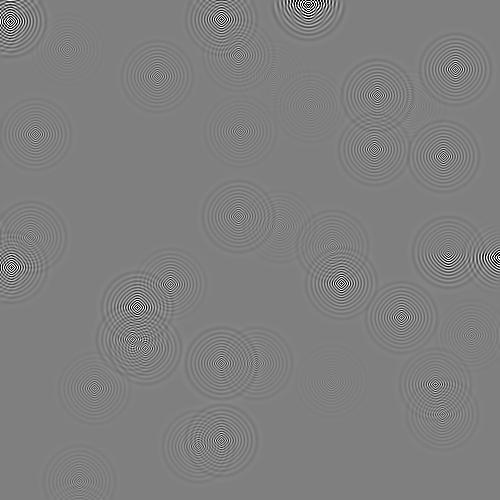

In [14]:
tf.initialize_all_variables().run()

for i in range(1000):
    step.run({eps: 0.03, damping: 0.04})
    if i % 50 == 0:
        clear_output()
        DisplayArray(U.eval(), rng=[-0.1, 0.1])